In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# magic commands
%config IPCompleter.greedy=True
%config Completer.use_jedi = False
%matplotlib inline

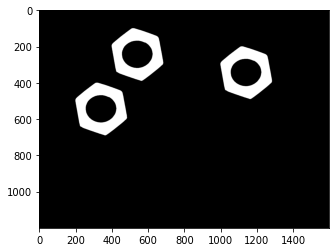

[[[1114  200]]

 [[1113  201]]

 [[1111  201]]

 [[1110  202]]

 [[1109  202]]

 [[1107  204]]

 [[1106  204]]

 [[1103  207]]

 [[1102  207]]

 [[1100  209]]

 [[1099  209]]

 [[1096  212]]

 [[1095  212]]

 [[1092  215]]

 [[1091  215]]

 [[1088  218]]

 [[1087  218]]

 [[1084  221]]

 [[1083  221]]

 [[1081  223]]

 [[1080  223]]

 [[1076  227]]

 [[1075  227]]

 [[1071  231]]

 [[1070  231]]

 [[1068  233]]

 [[1067  233]]

 [[1064  236]]

 [[1063  236]]

 [[1059  240]]

 [[1058  240]]

 [[1055  243]]

 [[1054  243]]

 [[1051  246]]

 [[1050  246]]

 [[1045  251]]

 [[1044  251]]

 [[1039  256]]

 [[1038  256]]

 [[1033  261]]

 [[1032  261]]

 [[1027  266]]

 [[1026  266]]

 [[1022  270]]

 [[1021  270]]

 [[1015  276]]

 [[1014  276]]

 [[1004  286]]

 [[1004  287]]

 [[1003  288]]

 [[1003  289]]

 [[1002  290]]

 [[1002  291]]

 [[1001  292]]

 [[1001  296]]

 [[1000  297]]

 [[1001  298]]

 [[1001  304]]

 [[1002  305]]

 [[1002  309]]

 [[1003  310]]

 [[1003  316]]

 [[1004 

In [6]:
belt_im =  cv.imread(r'belt.png', cv.IMREAD_GRAYSCALE)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU) 
# 3x3 matrix with all ones, with uint8 dtype
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3)) 
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel) # Dilation followed by Erosion
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*1).astype('uint8')

with open('belt16001200.txt', 'w') as f:
    for i in range(belt.shape[0]):
        f.write('{')
        for j in range(belt.shape[1]):
            f.write(str(belt[i,j]) + ', ')
        f.write('},\n')
    

plt.imshow(belt, cmap ='gray'),plt.show()

belt_cont,_ = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [7]:
BinaryImage = np.array([        
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ])

contour = cv.findContours(BinaryImage.astype('uint8'), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)